In [4]:
# data reading
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

#split data 
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270    0.361854    1.590899    5.058090    0.957449   
std      0.625851    0.9988

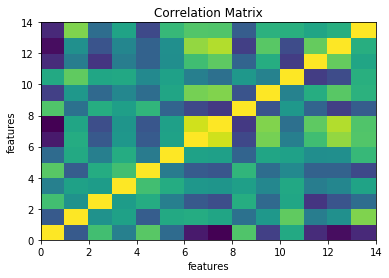

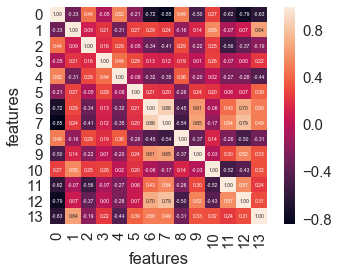

In [6]:
# Part1. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df_wine.describe())
print("number of rows = ", df_wine.shape[0])
print("number of cols = ", df_wine.shape[1])
cormat = df_wine.corr()
print(cormat)
plt.figure()
hm= pd.DataFrame(df_wine.corr())
plt.pcolor(hm)
plt.title("Correlation Matrix")
plt.xlabel("features")
plt.ylabel("features")
plt.show()

plt.figure()
cols = df_wine.columns
sns.set(font_scale=1.5)
cm = np.corrcoef(df_wine[cols].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 5},yticklabels=cols,xticklabels=cols)
plt.xlabel("features")
plt.ylabel("features")
plt.show()

In [7]:
# Part2
# Logistic 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_y_train_pred = lr.predict(X_train)
print( "Logistic Regression accurancy score(train): ",metrics.accuracy_score(y_train, lr_y_train_pred) )
lr_y_pred = lr.predict(X_test)
print( "Logistic Regression accurancy score(test): ",metrics.accuracy_score(y_test, lr_y_pred) )

#SVC
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C= 1.0, random_state= 1)
svm.fit(X_train, y_train)
svm_y_train_pred = svm.predict(X_train)
print( "SVM Regression accurancy score(train): ",metrics.accuracy_score(y_train, svm_y_train_pred) )
svm_y_pred = svm.predict(X_test)
print("SVM Regression accurancy score(test): ",metrics.accuracy_score(y_test, svm_y_pred) )

Logistic Regression accurancy score(train):  0.9788732394366197
Logistic Regression accurancy score(test):  0.9722222222222222
SVM Regression accurancy score(train):  1.0
SVM Regression accurancy score(test):  0.9444444444444444


In [8]:
#Part3 PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#Logistic Regression fitted on PCA transformed dataset

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
pca_lr_y_train_pred = lr.predict(X_train_pca)
pca_lr_y_pred = lr.predict(X_test_pca)
print("PCA of Logistic Regression accurancy score(train): ",metrics.accuracy_score(y_train, pca_lr_y_train_pred) )
print("PCA of Logistic Regressionaccurancy score(test): ",metrics.accuracy_score(y_test, pca_lr_y_pred) )

#SVM Regression fitted on PCA transformed dataset

svm.fit(X_train_pca, y_train)
pca_svm_y_train_pred = svm.predict(X_train_pca)
pca_svm_y_pred = svm.predict(X_test_pca)
print("PCA of SVM Regression accurancy score(train): ",metrics.accuracy_score(y_train, pca_svm_y_train_pred) )
print("PCA of SVM Regression accurancy score(test): ",metrics.accuracy_score(y_test, pca_svm_y_pred) )



PCA of Logistic Regression accurancy score(train):  0.971830985915493
PCA of Logistic Regressionaccurancy score(test):  0.9444444444444444
PCA of SVM Regression accurancy score(train):  0.9788732394366197
PCA of SVM Regression accurancy score(test):  0.9166666666666666


In [9]:
#Part4. 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

#Logistic Regression fitted on LDA transformed dataset

lda_lr_y_train_pred = lr.predict(X_train_lda)
lda_lr_y_pred = lr.predict(X_test_lda)

print("LDA of Logistic Regression accurancy score(Train): ",metrics.accuracy_score(y_train, lda_lr_y_train_pred) )
print("LDA of Logistic Regression accurancy score(Test): ",metrics.accuracy_score(y_test, lda_lr_y_pred) )

#SVM Regression fitted on LDA transformed dataset
svm = SVC(kernel = 'linear', C= 1.0, random_state= 1)
svm.fit(X_train_lda, y_train)
lda_svm_y_train_pred = svm.predict(X_train_lda)
lda_svm_y_pred = svm.predict(X_test_lda)
print("LDA of SVM Regression accurancy score(train): ",metrics.accuracy_score(y_train, lda_svm_y_train_pred) )
print("LDA of SVM Regression accurancy score(test): ",metrics.accuracy_score(y_test, lda_svm_y_pred) )


LDA of Logistic Regression accurancy score(Train):  1.0
LDA of Logistic Regression accurancy score(Test):  0.9722222222222222
LDA of SVM Regression accurancy score(train):  1.0
LDA of SVM Regression accurancy score(test):  0.9444444444444444


KPCA of Logistic Regression accurancy score(train) at gamma = 0.1:  0.9929577464788732
KPCA of Logistic Regression accurancy score(test) at gamma = 0.1:  1.0
KPCA of SVM Regression accurancy score(train) at gamma = 0.1:  0.971830985915493
KPCA of SVM Regression accurancy score(test) at gamma = 0.1: 0.9722222222222222


Text(0.5,1,'SVM Regression Fitted on KPCA Transformed Dataset')

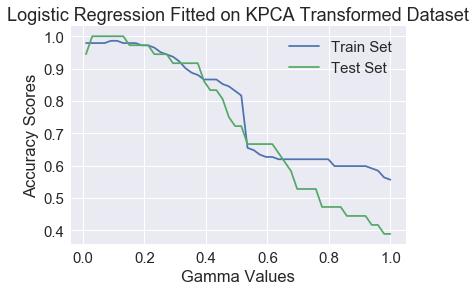

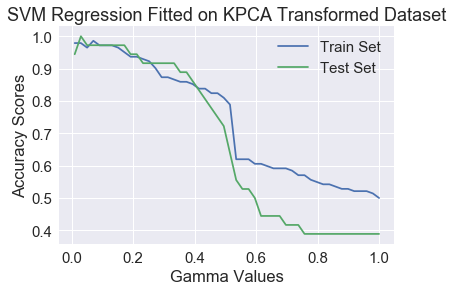

In [16]:
#Part5 
#Part 5
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2,kernel='rbf', gamma=0.1)
X_train_skernpca = scikit_kpca.fit_transform(X_train_std, y_train)
X_test_skernpca= scikit_kpca.transform(X_test_std)

#Logistic Regression fitted on KPCA transformed dataset
lr = LogisticRegression()
lr.fit(X_train_skernpca, y_train)
kpca_lr_y_train_pred = lr.predict(X_train_skernpca)
kpca_lr_y_pred = lr.predict(X_test_skernpca)
print("KPCA of Logistic Regression accurancy score(train) at gamma = 0.1: ",metrics.accuracy_score(y_train, kpca_lr_y_train_pred) )
print("KPCA of Logistic Regression accurancy score(test) at gamma = 0.1: ",metrics.accuracy_score(y_test, kpca_lr_y_pred) )

#SVM Regression fitted on KPCA transformed dataset
svm = SVC(kernel = 'linear', C= 1.0, random_state= 1)
svm.fit(X_train_skernpca, y_train)
kpca_svm_y_train_pred = svm.predict(X_train_skernpca)
kpca_svm_y_pred = svm.predict(X_test_skernpca)
print("KPCA of SVM Regression accurancy score(train) at gamma = 0.1: ",metrics.accuracy_score(y_train, kpca_svm_y_train_pred) )
print("KPCA of SVM Regression accurancy score(test) at gamma = 0.1:",metrics.accuracy_score(y_test, kpca_svm_y_pred) )

lr_train = []
lr_test = []
svm_train = []
svm_test = []


gamma_space = np.linspace(0.01,1, endpoint = True)
for gamma in gamma_space:
    scikit_kpca.gamma = gamma
    X_train_skernpca = scikit_kpca.fit_transform(X_train_std, y_train)
    X_test_skernpca= scikit_kpca.transform(X_test_std)
    
    #Logistic Regression fitted on KPCA transformed dataset
    lr = LogisticRegression()
    lr.fit(X_train_skernpca, y_train)
    kpca_lr_y_train_pred = lr.predict(X_train_skernpca)
    kpca_lr_y_pred = lr.predict(X_test_skernpca)
    lr_train.append(metrics.accuracy_score(y_train, kpca_lr_y_train_pred))
    lr_test.append(metrics.accuracy_score(y_test, kpca_lr_y_pred))

    #SVM Regression fitted on KPCA transformed dataset
    svm = SVC(kernel = 'rbf', C= 1.0, random_state= 1)
    svm.fit(X_train_skernpca, y_train)
    kpca_svm_y_train_pred = svm.predict(X_train_skernpca)
    kpca_svm_y_pred = svm.predict(X_test_skernpca)
    svm_train.append(metrics.accuracy_score(y_train, kpca_svm_y_train_pred))
    svm_test.append(metrics.accuracy_score(y_test, kpca_svm_y_pred))


plt.figure()
plt.plot(gamma_space, lr_train, label='Train Set')
plt.plot(gamma_space, lr_test, label='Test Set')
plt.legend(loc = 1)
plt.xlabel("Gamma Values")
plt.ylabel("Accuracy Scores")
plt.title("Logistic Regression Fitted on KPCA Transformed Dataset")

plt.figure()
plt.plot(gamma_space, svm_train, label='Train Set')
plt.plot(gamma_space, svm_test, label='Test Set')
plt.legend(loc = 1)
plt.xlabel("Gamma Values")
plt.ylabel("Accuracy Scores")
plt.title("SVM Regression Fitted on KPCA Transformed Dataset")

In [15]:
print("My name is {Xianhao Zhang}")
print("My NetID is: {xzhan137}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Xianhao Zhang}
My NetID is: {xzhan137}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
